![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png)<br>
<hr>

![alt text](http://1.bp.blogspot.com/-nqAGzznZQNo/UwS8rxjfXeI/AAAAAAAABTA/nunmRLowpps/s1600/PraxisLogo.gif)<br>
[Data Science Program](http://praxis.ac.in/Programs/business-analytics/)

<hr>

[Prithwis Mukerjee](http://www.yantrajaal.com)<br>



```
`# This is formatted as code`
```

# BDS Car Price Precdiction - Machine Learning <br>
https://www.datacamp.com/community/tutorials/apache-spark-tutorial-machine-learning

# Initialise

In [3]:
!apt-get update > /dev/null
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#!wget -q http://apache.osuosl.org/spark/spark-2.2.2/spark-2.2.2-bin-hadoop2.7.tgz
#!wget -q http://apache.osuosl.org/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
#wget -q http://apache.osuosl.org/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
#!wget -q http://apache.osuosl.org/spark/spark-2.4.6/spark-2.4.6-bin-hadoop2.7.tgz
#!wget -q http://apache.osuosl.org/spark/spark-3.0.1/spark-3.0.1-bin-hadoop3.2.tgz
!wget -q http://apache.osuosl.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
#
# if the current version of Spark is not used, there may be errors
# check here for current versions http://apache.osuosl.org/spark
#
#!tar xf spark-2.4.0-bin-hadoop2.7.tgz
#!tar xf spark-2.4.5-bin-hadoop2.7.tgz
#!tar xf spark-2.4.6-bin-hadoop2.7.tgz
#!tar xf spark-3.0.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
#!pip install -q findspark
!pip install -q pyspark

     |████████████████████████████████| 281.4 MB 37 kB/s 
     |████████████████████████████████| 198 kB 52.1 MB/s 


In [4]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
#os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"
#os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"
#os.environ["SPARK_HOME"] = "/content/spark-2.4.6-bin-hadoop2.7"
#os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop3.2"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

In [5]:
#import findspark
#findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [6]:
car_data = sc.textFile('/content/Dataset/CAR_DETAILS_FROM_CAR_DEKHO.txt').flatMap(lambda l:l.split(","))

In [7]:
car_data.collect()

['name',
 'year',
 'selling_price',
 'km_driven',
 'fuel',
 'seller_type',
 'transmission',
 'owner',
 'Maruti 800 AC',
 '2007',
 '60000',
 '70000',
 'Petrol',
 'Individual',
 'Manual',
 'First Owner',
 'Maruti Wagon R LXI Minor',
 '2007',
 '135000',
 '50000',
 'Petrol',
 'Individual',
 'Manual',
 'First Owner',
 'Hyundai Verna 1.6 SX',
 '2012',
 '600000',
 '100000',
 'Diesel',
 'Individual',
 'Manual',
 'First Owner',
 'Datsun RediGO T Option',
 '2017',
 '250000',
 '46000',
 'Petrol',
 'Individual',
 'Manual',
 'First Owner',
 'Honda Amaze VX i-DTEC',
 '2014',
 '450000',
 '141000',
 'Diesel',
 'Individual',
 'Manual',
 'Second Owner',
 'Maruti Alto LX BSIII',
 '2007',
 '140000',
 '125000',
 'Petrol',
 'Individual',
 'Manual',
 'First Owner',
 'Hyundai Xcent 1.2 Kappa S',
 '2016',
 '550000',
 '25000',
 'Petrol',
 'Individual',
 'Manual',
 'First Owner',
 'Tata Indigo Grand Petrol',
 '2014',
 '240000',
 '60000',
 'Petrol',
 'Individual',
 'Manual',
 'Second Owner',
 'Hyundai Creta 1.6 V

In [8]:
carRDD = sc.textFile('/content/Dataset/CAR_DETAILS_FROM_CAR_DEKHO.csv').map(lambda l:l.split())

In [9]:
carRDD.take(2)

[['name,year,selling_price,km_driven,fuel,seller_type,transmission,owner'],
 ['Maruti',
  '800',
  'AC,2007,60000,70000,Petrol,Individual,Manual,First',
  'Owner']]

In [10]:
# Import the necessary modules 
from pyspark.sql import Row

Loading Data

In [11]:
data = spark.read.csv('/content/Dataset/CAR_DETAILS_FROM_CAR_DEKHO.csv', inferSchema=True, header=True)
data.show(10)

+--------------------+----+-------------+---------+------+-----------+------------+------------+
|                name|year|selling_price|km_driven|  fuel|seller_type|transmission|       owner|
+--------------------+----+-------------+---------+------+-----------+------------+------------+
|       Maruti 800 AC|2007|        60000|    70000|Petrol| Individual|      Manual| First Owner|
|Maruti Wagon R LX...|2007|       135000|    50000|Petrol| Individual|      Manual| First Owner|
|Hyundai Verna 1.6 SX|2012|       600000|   100000|Diesel| Individual|      Manual| First Owner|
|Datsun RediGO T O...|2017|       250000|    46000|Petrol| Individual|      Manual| First Owner|
|Honda Amaze VX i-...|2014|       450000|   141000|Diesel| Individual|      Manual|Second Owner|
|Maruti Alto LX BSIII|2007|       140000|   125000|Petrol| Individual|      Manual| First Owner|
|Hyundai Xcent 1.2...|2016|       550000|    25000|Petrol| Individual|      Manual| First Owner|
|Tata Indigo Grand...|2014|   

In [12]:
data.count(), len(data.columns)

(4340, 8)

In [12]:
data.dtypes

[('name', 'string'),
 ('year', 'int'),
 ('selling_price', 'int'),
 ('km_driven', 'int'),
 ('fuel', 'string'),
 ('seller_type', 'string'),
 ('transmission', 'string'),
 ('owner', 'string')]

A schema is a big picture of your dataset. What your dataset actually narrates. Columns name of dataframe, with their datatype.

In [13]:
data.printSchema()

root
 |-- name: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- selling_price: integer (nullable = true)
 |-- km_driven: integer (nullable = true)
 |-- fuel: string (nullable = true)
 |-- seller_type: string (nullable = true)
 |-- transmission: string (nullable = true)
 |-- owner: string (nullable = true)



In [14]:
#view statistical measures of data 
data.describe().show()

+-------+--------------------+------------------+-----------------+-----------------+------+----------------+------------+-----------+
|summary|                name|              year|    selling_price|        km_driven|  fuel|     seller_type|transmission|      owner|
+-------+--------------------+------------------+-----------------+-----------------+------+----------------+------------+-----------+
|  count|                4340|              4340|             4340|             4340|  4340|            4340|        4340|       4340|
|   mean|                null|2013.0907834101383|504127.3117511521|66215.77741935484|  null|            null|        null|       null|
| stddev|                null| 4.215343939724156|578548.7361388858|46644.10219362085|  null|            null|        null|       null|
|    min|Ambassador CLASSI...|              1992|            20000|                1|   CNG|          Dealer|   Automatic|First Owner|
|    max|Volvo XC60 D5 Ins...|              2020|      

As 'name', 'fuel', 'seller_type' and 'transmission' are all object type attributes so they don't have mean and standard deviation, as a result in summary for the mentioned attributes these particular things are null

# Data Exploration

In [15]:
data.count()   #The number of rows

4340

In [16]:
data.columns

['name',
 'year',
 'selling_price',
 'km_driven',
 'fuel',
 'seller_type',
 'transmission',
 'owner']

Checking for Null values

In [19]:
for col in data.columns:
  print(col, "has", data.filter(data[col].isNull()).count(), "Null values.")

name has 0 Null values.
year has 0 Null values.
selling_price has 0 Null values.
km_driven has 0 Null values.
fuel has 0 Null values.
seller_type has 0 Null values.
transmission has 0 Null values.
owner has 0 Null values.


Above we can see that there are no null values in the data

Showing Group wise count

Using groupby() function

In [22]:
data.groupBy("fuel").count().sort("fuel").show()

+--------+-----+
|    fuel|count|
+--------+-----+
|     CNG|   40|
|  Diesel| 2153|
|Electric|    1|
|     LPG|   23|
|  Petrol| 2123|
+--------+-----+



As the number of instance with 'Electric' as fuel is only 1 so we can't keep it because it won't help in random split of the data because this instance will either in train set or test set. So after training the model it will create problem for prediction 

In [49]:
# Checking for the instance where the fuel is 'Electric'
data.where(data.fuel == 'Electric').show()

+-------------------+----+-------------+---------+--------+-----------+------------+------------+
|               name|year|selling_price|km_driven|    fuel|seller_type|transmission|       owner|
+-------------------+----+-------------+---------+--------+-----------+------------+------------+
|Toyota Camry Hybrid|2006|       310000|    62000|Electric|     Dealer|   Automatic|Second Owner|
+-------------------+----+-------------+---------+--------+-----------+------------+------------+



Creating a new dataframe where all the instances will be present except Electric fuel. This data frame will be used now onwards

In [51]:
new_data = data.filter((data.fuel != "Electric"))
  
new_data.show()


+--------------------+----+-------------+---------+------+-----------+------------+------------+
|                name|year|selling_price|km_driven|  fuel|seller_type|transmission|       owner|
+--------------------+----+-------------+---------+------+-----------+------------+------------+
|       Maruti 800 AC|2007|        60000|    70000|Petrol| Individual|      Manual| First Owner|
|Maruti Wagon R LX...|2007|       135000|    50000|Petrol| Individual|      Manual| First Owner|
|Hyundai Verna 1.6 SX|2012|       600000|   100000|Diesel| Individual|      Manual| First Owner|
|Datsun RediGO T O...|2017|       250000|    46000|Petrol| Individual|      Manual| First Owner|
|Honda Amaze VX i-...|2014|       450000|   141000|Diesel| Individual|      Manual|Second Owner|
|Maruti Alto LX BSIII|2007|       140000|   125000|Petrol| Individual|      Manual| First Owner|
|Hyundai Xcent 1.2...|2016|       550000|    25000|Petrol| Individual|      Manual| First Owner|
|Tata Indigo Grand...|2014|   

In [116]:
from pyspark.sql.functions import *

Some Preprocessing with 'year' column as apurpose for EDA. Adding a column year_of_service by sbtracting the given year from the current year

In [119]:
new_data = new_data.withColumn("current_year",year(current_date()))
#new_data = new_data.withcolumn("")
new_data.show()


+--------------------+----+-------------+---------+------+-----------+------------+------------+------------+------------+
|                name|year|selling_price|km_driven|  fuel|seller_type|transmission|       owner|current_date|current_year|
+--------------------+----+-------------+---------+------+-----------+------------+------------+------------+------------+
|       Maruti 800 AC|2007|        60000|    70000|Petrol| Individual|      Manual| First Owner|  2022-03-05|        2022|
|Maruti Wagon R LX...|2007|       135000|    50000|Petrol| Individual|      Manual| First Owner|  2022-03-05|        2022|
|Hyundai Verna 1.6 SX|2012|       600000|   100000|Diesel| Individual|      Manual| First Owner|  2022-03-05|        2022|
|Datsun RediGO T O...|2017|       250000|    46000|Petrol| Individual|      Manual| First Owner|  2022-03-05|        2022|
|Honda Amaze VX i-...|2014|       450000|   141000|Diesel| Individual|      Manual|Second Owner|  2022-03-05|        2022|
|Maruti Alto LX 

In [120]:
new_data.dtypes

[('name', 'string'),
 ('year', 'int'),
 ('selling_price', 'int'),
 ('km_driven', 'int'),
 ('fuel', 'string'),
 ('seller_type', 'string'),
 ('transmission', 'string'),
 ('owner', 'string'),
 ('current_date', 'date'),
 ('current_year', 'int')]

In [124]:
new_data = new_data.withColumn("year_of_service",new_data.current_year - new_data.year)
new_data.show(5)

+--------------------+----+-------------+---------+------+-----------+------------+------------+------------+------------+---------------+
|                name|year|selling_price|km_driven|  fuel|seller_type|transmission|       owner|current_date|current_year|year_of_service|
+--------------------+----+-------------+---------+------+-----------+------------+------------+------------+------------+---------------+
|       Maruti 800 AC|2007|        60000|    70000|Petrol| Individual|      Manual| First Owner|  2022-03-05|        2022|             15|
|Maruti Wagon R LX...|2007|       135000|    50000|Petrol| Individual|      Manual| First Owner|  2022-03-05|        2022|             15|
|Hyundai Verna 1.6 SX|2012|       600000|   100000|Diesel| Individual|      Manual| First Owner|  2022-03-05|        2022|             10|
|Datsun RediGO T O...|2017|       250000|    46000|Petrol| Individual|      Manual| First Owner|  2022-03-05|        2022|              5|
|Honda Amaze VX i-...|2014|

In [125]:
new_data.count(), len(new_data.columns)

(4339, 11)

Rechecking for the 'Electric' fuel instance in this new dataframe

In [126]:
new_data.where(new_data.fuel == 'Electric').show()

+----+----+-------------+---------+----+-----------+------------+-----+------------+------------+---------------+
|name|year|selling_price|km_driven|fuel|seller_type|transmission|owner|current_date|current_year|year_of_service|
+----+----+-------------+---------+----+-----------+------------+-----+------------+------------+---------------+
+----+----+-------------+---------+----+-----------+------------+-----+------------+------------+---------------+



In [127]:
new_data.groupBy("seller_type").count().sort("seller_type",ascending=True).show()

+----------------+-----+
|     seller_type|count|
+----------------+-----+
|          Dealer|  993|
|      Individual| 3244|
|Trustmark Dealer|  102|
+----------------+-----+



In [128]:
new_data.groupBy("transmission").count().sort("transmission",ascending=True).show()

+------------+-----+
|transmission|count|
+------------+-----+
|   Automatic|  447|
|      Manual| 3892|
+------------+-----+



In [61]:
new_data.groupBy("owner").count().sort("owner",ascending=True).show()

+--------------------+-----+
|               owner|count|
+--------------------+-----+
|         First Owner| 2832|
|Fourth & Above Owner|   81|
|        Second Owner| 1105|
|      Test Drive Car|   17|
|         Third Owner|  304|
+--------------------+-----+



In [62]:
new_data.groupBy("name").count().sort("name",ascending=True).show()

+--------------------+-----+
|                name|count|
+--------------------+-----+
|Ambassador CLASSI...|    2|
|Ambassador Classi...|    1|
|Ambassador Grand ...|    1|
|    Audi A4 1.8 TFSI|    1|
|     Audi A4 2.0 TDI|    1|
|Audi A4 2.0 TDI 1...|    2|
|Audi A4 3.0 TDI Q...|   12|
|Audi A4 30 TFSI T...|    2|
|Audi A4 35 TDI Pr...|    1|
|Audi A4 35 TDI Pr...|    1|
|Audi A4 New  2.0 ...|    1|
|   Audi A5 Sportback|    1|
|Audi A6 2.0 TDI  ...|    3|
|Audi A6 2.0 TDI P...|   13|
|     Audi A6 2.7 TDI|    1|
|     Audi A6 2.8 FSI|    1|
|     Audi A8 4.2 TDI|    2|
|Audi A8 L 3.0 TDI...|    1|
|Audi Q3 2.0 TDI Q...|    4|
|Audi Q3 35 TDI Qu...|    2|
+--------------------+-----+
only showing top 20 rows



Showing group wise average selling_price

In [64]:
new_data.groupBy('owner').mean('selling_price','km_driven').show()

+--------------------+------------------+------------------+
|               owner|avg(selling_price)|    avg(km_driven)|
+--------------------+------------------+------------------+
|         Third Owner| 269474.0032894737| 99304.50657894737|
|Fourth & Above Owner|173901.19753086418| 99138.13580246913|
|        Second Owner|343921.75927601807| 81801.42262443439|
|         First Owner| 598636.9696327683|56015.009887005646|
|      Test Drive Car| 954293.9411764706|            4155.0|
+--------------------+------------------+------------------+



In [65]:
new_data.groupBy('transmission').mean('selling_price','km_driven').show()

+------------+------------------+-----------------+
|transmission|avg(selling_price)|   avg(km_driven)|
+------------+------------------+-----------------+
|   Automatic| 1410610.720357942|49661.26174496644|
|      Manual| 400066.6857656732|68118.16289825282|
+------------+------------------+-----------------+



In [66]:
new_data.groupBy('fuel').mean('selling_price','km_driven').show()

+------+------------------+-----------------+
|  fuel|avg(selling_price)|   avg(km_driven)|
+------+------------------+-----------------+
|Diesel| 669094.2522062239|79630.97770552717|
|   CNG|        277174.925|         67234.75|
|   LPG|167826.04347826086|89634.78260869565|
|Petrol| 344840.1375412153|52340.07960433349|
+------+------------------+-----------------+



In [67]:
new_data.groupBy('year').mean('selling_price','km_driven').show()

+----+------------------+------------------+
|year|avg(selling_price)|    avg(km_driven)|
+----+------------------+------------------+
|2003| 86565.21739130435| 81671.34782608696|
|2007|162828.35074626867| 89308.67910447762|
|2018| 910770.4590163934|27233.784153005465|
|2015| 528942.9548693587| 60585.20665083135|
|2006| 156403.6146788991|102976.39449541284|
|2013| 484801.0129533679| 72728.42227979275|
|1997|           93000.0|           90000.0|
|2014| 523231.5640326975| 75685.27247956404|
|2019| 1059020.482051282|20912.476923076923|
|2004|121749.97619047618| 90273.30952380953|
|1996|          225000.0|           47500.0|
|1998|          214000.0|64583.333333333336|
|2020|        818479.125|11037.166666666666|
|2012| 371628.8530120482| 83393.55421686747|
|2009|229564.73575129535| 92521.28497409326|
|2016| 608364.0924369748| 55205.90476190476|
|1995|           95000.0|          100000.0|
|2001|          117649.9|          83712.85|
|1992|           50000.0|          100000.0|
|2005|1090

In [129]:
new_data.groupBy('year_of_service').mean('selling_price','km_driven').show()

+---------------+------------------+------------------+
|year_of_service|avg(selling_price)|    avg(km_driven)|
+---------------+------------------+------------------+
|             26|          225000.0|           47500.0|
|             27|           95000.0|          100000.0|
|             12| 269678.1282051282| 91735.43589743589|
|             22|           81500.0| 70936.91666666667|
|             13|229564.73575129535| 92521.28497409326|
|              6| 608364.0924369748| 55205.90476190476|
|             16| 156403.6146788991|102976.39449541284|
|              3| 1059020.482051282|20912.476923076923|
|             20| 90714.28571428571| 85047.61904761905|
|              5|  768909.839055794| 40485.76394849786|
|             19| 86565.21739130435| 81671.34782608696|
|             15|162828.35074626867| 89308.67910447762|
|              9| 484801.0129533679| 72728.42227979275|
|             17|109013.02352941176| 80991.51764705882|
|              4| 910770.4590163934|27233.784153

In [130]:
import pandas as pd
import numpy as np

In [131]:
DF = new_data.toPandas()

In [132]:
DF.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_date,current_year,year_of_service
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,2022-03-05,2022,15
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,2022-03-05,2022,15
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,2022-03-05,2022,10
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,2022-03-05,2022,5
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2022-03-05,2022,8


In [133]:
DF = DF.set_index('name')

In [134]:
DF.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_date,current_year,year_of_service
name,,,,,,,,,,
Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,2022-03-05,2022,15
Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,2022-03-05,2022,15
Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,2022-03-05,2022,10
Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,2022-03-05,2022,5
Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2022-03-05,2022,8


In [155]:
cor = DF.corr()

In [156]:
cor.selling_price.sort_values(ascending=False)

selling_price      1.000000
year               0.413932
km_driven         -0.192298
year_of_service   -0.413932
current_year            NaN
Name: selling_price, dtype: float64

As we found that there we few instances of name with 1 or 2 values only, so that would create a problem while training and testing as after the random sampling and splitting those single instances would either go to train set or test set. So, we are converting this 'name' column to the index for this dataframe

We can do some graph plotting using this pandas dataframe for our ease of work

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


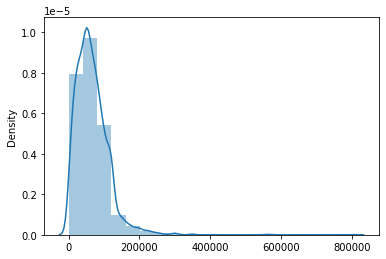

In [136]:
sns.distplot(x=DF['km_driven'], bins=20, kde=True)

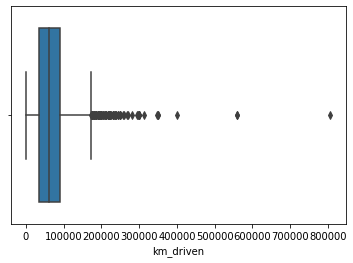

In [137]:
sns.boxplot(x='km_driven',data=DF)

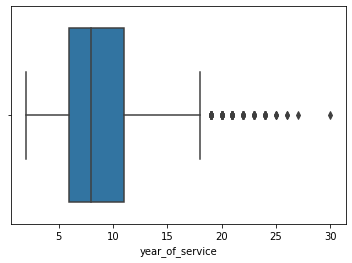

In [147]:
sns.boxplot(x='year_of_service', data=DF)

In [110]:
#DF['km_driven'].plot(kind='hist', bins=25)

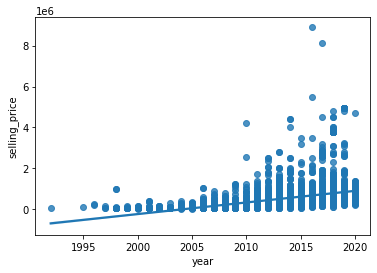

In [143]:
sns.regplot(x='year', y='selling_price', data=DF)

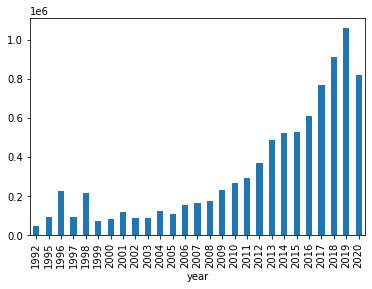

In [114]:
plt.figure()
DF.groupby('year')['selling_price'].mean().plot(kind='bar')

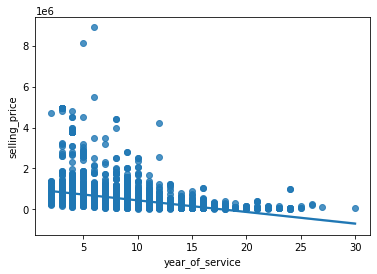

In [144]:
sns.regplot(x='year_of_service', y='selling_price', data=DF)

It shows that with increasing year the selling price of a car has been increased gradually or in other words, the car with highest year of service has lowest selling price i.e, the oldest car has lowest selling price

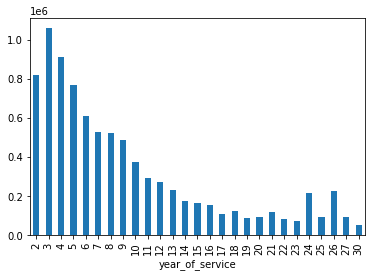

In [148]:
plt.figure()
DF.groupby('year_of_service')['selling_price'].mean().plot(kind='bar')

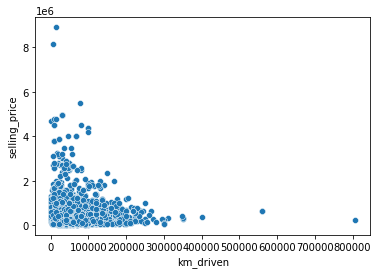

In [146]:
sns.scatterplot(x='km_driven', y='selling_price',data=DF )

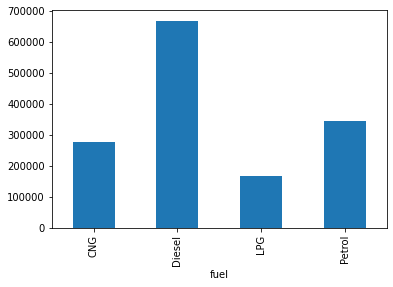

In [138]:
plt.figure()
DF.groupby('fuel')['selling_price'].mean().plot(kind='bar')

The above graph says that Diesel car has the highest mean selling price

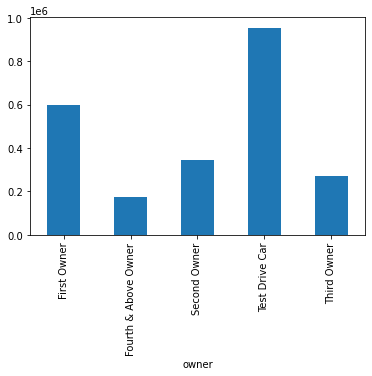

In [139]:
plt.figure()
DF.groupby('owner')['selling_price'].mean().plot(kind='bar')

Inference: From the above graph we can say that Test Drive Car has the highest average selling price

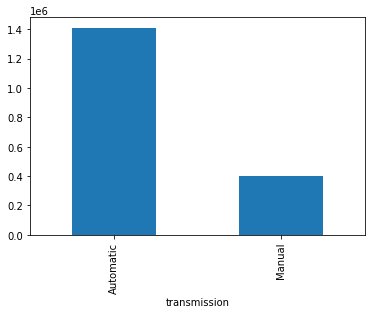

In [83]:
plt.figure()
DF.groupby('transmission')['selling_price'].mean().plot(kind='bar')

In the above graph we can see that Automatic car has the highest average selling price

In [115]:
#from datetime import date

In [161]:
new_data.show(5)

+--------------------+----+-------------+---------+------+-----------+------------+------------+------------+------------+---------------+
|                name|year|selling_price|km_driven|  fuel|seller_type|transmission|       owner|current_date|current_year|year_of_service|
+--------------------+----+-------------+---------+------+-----------+------------+------------+------------+------------+---------------+
|       Maruti 800 AC|2007|        60000|    70000|Petrol| Individual|      Manual| First Owner|  2022-03-05|        2022|             15|
|Maruti Wagon R LX...|2007|       135000|    50000|Petrol| Individual|      Manual| First Owner|  2022-03-05|        2022|             15|
|Hyundai Verna 1.6 SX|2012|       600000|   100000|Diesel| Individual|      Manual| First Owner|  2022-03-05|        2022|             10|
|Datsun RediGO T O...|2017|       250000|    46000|Petrol| Individual|      Manual| First Owner|  2022-03-05|        2022|              5|
|Honda Amaze VX i-...|2014|

In [278]:
new_data = spark.createDataFrame(DF.rename_axis('name').reset_index() )
#spark.createDataFrame(data_clean.rename_axis('name').reset_index())

In [279]:
new_data.show()

+--------------------+----+-------------+---------+------+-----------+------------+------------+------------+------------+---------------+
|                name|year|selling_price|km_driven|  fuel|seller_type|transmission|       owner|current_date|current_year|year_of_service|
+--------------------+----+-------------+---------+------+-----------+------------+------------+------------+------------+---------------+
|       Maruti 800 AC|2007|        60000|    70000|Petrol| Individual|      Manual| First Owner|  2022-03-05|        2022|             15|
|Maruti Wagon R LX...|2007|       135000|    50000|Petrol| Individual|      Manual| First Owner|  2022-03-05|        2022|             15|
|Hyundai Verna 1.6 SX|2012|       600000|   100000|Diesel| Individual|      Manual| First Owner|  2022-03-05|        2022|             10|
|Datsun RediGO T O...|2017|       250000|    46000|Petrol| Individual|      Manual| First Owner|  2022-03-05|        2022|              5|
|Honda Amaze VX i-...|2014|

In [280]:
new_data.select('year_of_service').distinct().rdd.map(lambda r: r[0]).collect()

[26,
 19,
 22,
 7,
 25,
 6,
 9,
 27,
 17,
 5,
 10,
 3,
 12,
 8,
 11,
 2,
 4,
 13,
 18,
 14,
 21,
 15,
 30,
 23,
 20,
 16,
 24]

Above we can see that the year_of_service column doesn't have any single instance. If it would have any value 1 then it would have to be deleted.

 Checking For Correlation

In [281]:
from pyspark.sql.functions import corr

In [282]:
new_data.corr('km_driven','selling_price')

-0.19229829804919749

In [283]:
new_data.corr('year_of_service','selling_price')

-0.41393195880109773

In [284]:
type(new_data)

pyspark.sql.dataframe.DataFrame

Removing Unnecessary Columns:
The 'name' column doesn't seem to be necessary. So removing that. As well as the 'current_year' , 'current_date', 'year'

In [285]:
new_data = new_data.drop("current_date", "current_year", "name","year")

In [287]:
new_data.show(5)

+-------------+---------+------+-----------+------------+------------+---------------+
|selling_price|km_driven|  fuel|seller_type|transmission|       owner|year_of_service|
+-------------+---------+------+-----------+------------+------------+---------------+
|        60000|    70000|Petrol| Individual|      Manual| First Owner|             15|
|       135000|    50000|Petrol| Individual|      Manual| First Owner|             15|
|       600000|   100000|Diesel| Individual|      Manual| First Owner|             10|
|       250000|    46000|Petrol| Individual|      Manual| First Owner|              5|
|       450000|   141000|Diesel| Individual|      Manual|Second Owner|              8|
+-------------+---------+------+-----------+------------+------------+---------------+
only showing top 5 rows



In [288]:
from pyspark.ml.feature import StringIndexer

In [351]:
from pyspark.ml.feature import OneHotEncoder

In [352]:
from pyspark.ml.feature import VectorAssembler

In [289]:
type_indexer = StringIndexer(inputCol="fuel", outputCol="fuel_indexer").fit(new_data)
new_data = type_indexer.transform(new_data)

In [290]:
type_encoder = OneHotEncoder(inputCol="fuel_indexer", outputCol="fuel_Vector").fit(new_data)
new_data = type_encoder.transform(new_data)

In [291]:
type_indexer = StringIndexer(inputCol="seller_type", outputCol="seller_type_indexer").fit(new_data)
new_data = type_indexer.transform(new_data)

In [292]:
type_encoder = OneHotEncoder(inputCol="seller_type_indexer", outputCol="seller_type_vector").fit(new_data)
new_data = type_encoder.transform(new_data)

In [294]:
type_indexer = StringIndexer(inputCol="owner", outputCol="owner_indexer").fit(new_data)
new_data = type_indexer.transform(new_data)

In [295]:
type_encoder = OneHotEncoder(inputCol="owner_indexer", outputCol="owner_vector").fit(new_data)
new_data = type_encoder.transform(new_data)

In [296]:
type_indexer = StringIndexer(inputCol="transmission", outputCol="transmission_indexer").fit(new_data)
new_data = type_indexer.transform(new_data)

In [297]:
type_encoder = OneHotEncoder(inputCol="transmission_indexer", outputCol="transmission_vector").fit(new_data)
new_data = type_encoder.transform(new_data)

In [298]:
new_data.show(3)

+-------------+---------+------+-----------+------------+-----------+---------------+------------+-------------+-------------------+------------------+-------------+-------------+--------------------+-------------------+
|selling_price|km_driven|  fuel|seller_type|transmission|      owner|year_of_service|fuel_indexer|  fuel_Vector|seller_type_indexer|seller_type_vector|owner_indexer| owner_vector|transmission_indexer|transmission_vector|
+-------------+---------+------+-----------+------------+-----------+---------------+------------+-------------+-------------------+------------------+-------------+-------------+--------------------+-------------------+
|        60000|    70000|Petrol| Individual|      Manual|First Owner|             15|         1.0|(3,[1],[1.0])|                0.0|     (2,[0],[1.0])|          0.0|(4,[0],[1.0])|                 0.0|      (1,[0],[1.0])|
|       135000|    50000|Petrol| Individual|      Manual|First Owner|             15|         1.0|(3,[1],[1.0])|    

In [300]:
new_data1 = new_data.drop("fuel","seller_type","owner","transmission")

In [305]:
new_data1.show(5)

+-------------+---------+---------------+------------+-------------+-------------------+------------------+-------------+-------------+--------------------+-------------------+
|selling_price|km_driven|year_of_service|fuel_indexer|  fuel_Vector|seller_type_indexer|seller_type_vector|owner_indexer| owner_vector|transmission_indexer|transmission_vector|
+-------------+---------+---------------+------------+-------------+-------------------+------------------+-------------+-------------+--------------------+-------------------+
|        60000|    70000|             15|         1.0|(3,[1],[1.0])|                0.0|     (2,[0],[1.0])|          0.0|(4,[0],[1.0])|                 0.0|      (1,[0],[1.0])|
|       135000|    50000|             15|         1.0|(3,[1],[1.0])|                0.0|     (2,[0],[1.0])|          0.0|(4,[0],[1.0])|                 0.0|      (1,[0],[1.0])|
|       600000|   100000|             10|         0.0|(3,[0],[1.0])|                0.0|     (2,[0],[1.0])|        

In [307]:
from pyspark.ml.linalg import DenseVector

In [302]:
from pyspark.ml.feature import StandardScaler

In [308]:
input_data = new_data.rdd.map(lambda x: (x[0], DenseVector(x[1:])))

In [311]:
df_assembler = VectorAssembler(inputCols=['km_driven', 'year_of_service', 'fuel_Vector', 'seller_type_vector', 
                                          'owner_vector', 'transmission_vector'], outputCol="features")
#df = df_assembler.transform(df)

In [315]:
df = df_assembler.transform(new_data1)

In [318]:
df.show(5)

+-------------+---------+---------------+------------+-------------+-------------------+------------------+-------------+-------------+--------------------+-------------------+--------------------+
|selling_price|km_driven|year_of_service|fuel_indexer|  fuel_Vector|seller_type_indexer|seller_type_vector|owner_indexer| owner_vector|transmission_indexer|transmission_vector|            features|
+-------------+---------+---------------+------------+-------------+-------------------+------------------+-------------+-------------+--------------------+-------------------+--------------------+
|        60000|    70000|             15|         1.0|(3,[1],[1.0])|                0.0|     (2,[0],[1.0])|          0.0|(4,[0],[1.0])|                 0.0|      (1,[0],[1.0])|(12,[0,1,3,5,7,11...|
|       135000|    50000|             15|         1.0|(3,[1],[1.0])|                0.0|     (2,[0],[1.0])|          0.0|(4,[0],[1.0])|                 0.0|      (1,[0],[1.0])|(12,[0,1,3,5,7,11...|
|       60

In [323]:
df.select(['features','selling_price']).show(5)

+--------------------+-------------+
|            features|selling_price|
+--------------------+-------------+
|(12,[0,1,3,5,7,11...|        60000|
|(12,[0,1,3,5,7,11...|       135000|
|(12,[0,1,2,5,7,11...|       600000|
|(12,[0,1,3,5,7,11...|       250000|
|(12,[0,1,2,5,8,11...|       450000|
+--------------------+-------------+
only showing top 5 rows



In [324]:
from pyspark.ml.feature import StandardScaler

In [325]:
# Initialize the `standardScaler`
standardScaler = StandardScaler(inputCol="features", outputCol="features_scaled")

In [326]:
# Fit the DataFrame to the scaler
scaler = standardScaler.fit(df)

In [328]:
# Transform the data in `df` with the scaler
scaled_df = scaler.transform(df)

In [329]:
scaled_df.take(2)

[Row(selling_price=60000, km_driven=70000, year_of_service=15, fuel_indexer=1.0, fuel_Vector=SparseVector(3, {1: 1.0}), seller_type_indexer=0.0, seller_type_vector=SparseVector(2, {0: 1.0}), owner_indexer=0.0, owner_vector=SparseVector(4, {0: 1.0}), transmission_indexer=0.0, transmission_vector=SparseVector(1, {0: 1.0}), features=SparseVector(12, {0: 70000.0, 1: 15.0, 3: 1.0, 5: 1.0, 7: 1.0, 11: 1.0}), features_scaled=SparseVector(12, {0: 1.5006, 1: 3.5592, 3: 2.0002, 5: 2.3019, 7: 2.1001, 11: 3.2893})),
 Row(selling_price=135000, km_driven=50000, year_of_service=15, fuel_indexer=1.0, fuel_Vector=SparseVector(3, {1: 1.0}), seller_type_indexer=0.0, seller_type_vector=SparseVector(2, {0: 1.0}), owner_indexer=0.0, owner_vector=SparseVector(4, {0: 1.0}), transmission_indexer=0.0, transmission_vector=SparseVector(1, {0: 1.0}), features=SparseVector(12, {0: 50000.0, 1: 15.0, 3: 1.0, 5: 1.0, 7: 1.0, 11: 1.0}), features_scaled=SparseVector(12, {0: 1.0718, 1: 3.5592, 3: 2.0002, 5: 2.3019, 7: 2.

Building ML Models

In [330]:
# Split the data into train and test sets
train_data, test_data = scaled_df.randomSplit([.7,.3],seed=1234)

In [331]:
train_data.show()

+-------------+---------+---------------+------------+-------------+-------------------+------------------+-------------+-------------+--------------------+-------------------+--------------------+--------------------+
|selling_price|km_driven|year_of_service|fuel_indexer|  fuel_Vector|seller_type_indexer|seller_type_vector|owner_indexer| owner_vector|transmission_indexer|transmission_vector|            features|     features_scaled|
+-------------+---------+---------------+------------+-------------+-------------------+------------------+-------------+-------------+--------------------+-------------------+--------------------+--------------------+
|        40000|    30000|             21|         1.0|(3,[1],[1.0])|                0.0|     (2,[0],[1.0])|          0.0|(4,[0],[1.0])|                 0.0|      (1,[0],[1.0])|(12,[0,1,3,5,7,11...|(12,[0,1,3,5,7,11...|
|        40000|    40000|             24|         1.0|(3,[1],[1.0])|                0.0|     (2,[0],[1.0])|          3.0|(4,

In [332]:
# Import `LinearRegression`
from pyspark.ml.regression import LinearRegression

In [335]:
# Initialize `lr`
lr = LinearRegression(labelCol="selling_price", maxIter=10, regParam=0.3, elasticNetParam=0.8)

In [336]:
# Fit the data to the model
linearModel = lr.fit(train_data)

In [337]:
# Generate predictions
predicted = linearModel.transform(test_data)
predicted.show()

+-------------+---------+---------------+------------+-------------+-------------------+------------------+-------------+-------------+--------------------+-------------------+--------------------+--------------------+-------------------+
|selling_price|km_driven|year_of_service|fuel_indexer|  fuel_Vector|seller_type_indexer|seller_type_vector|owner_indexer| owner_vector|transmission_indexer|transmission_vector|            features|     features_scaled|         prediction|
+-------------+---------+---------------+------------+-------------+-------------------+------------------+-------------+-------------+--------------------+-------------------+--------------------+--------------------+-------------------+
|        35000|    35000|             10|         1.0|(3,[1],[1.0])|                0.0|     (2,[0],[1.0])|          2.0|(4,[2],[1.0])|                 0.0|      (1,[0],[1.0])|(12,[0,1,3,5,9,11...|(12,[0,1,3,5,9,11...| 205916.26957690832|
|        40000|    19000|             11|   

In [338]:
# Coefficients for the model
linearModel.coefficients

DenseVector([-0.7653, -35659.6256, 159592.4158, -132239.2687, -129875.545, -176054.7338, -119577.9946, 13465.6732, -16949.0921, -27191.4572, 5436.1468, -877696.5257])

In [339]:
# Intercept for the model
linearModel.intercept

1802478.925845782

In [340]:
# Get the RMSE
linearModel.summary.rootMeanSquaredError

401906.50516186724

In [344]:
# Get the R2
linearModel.summary.r2

0.4794838844239636

#Chronobooks <br>
![alt text](https://1.bp.blogspot.com/-lTiYBkU2qbU/X1er__fvnkI/AAAAAAAAjtE/GhDR3OEGJr4NG43fZPodrQD5kbxtnKebgCLcBGAsYHQ/s600/Footer2020-600x200.png)<hr>
Chronotantra and Chronoyantra are two science fiction novels that explore the collapse of human civilisation on Earth and then its rebirth and reincarnation both on Earth as well as on the distant worlds of Mars, Titan and Enceladus. But is it the human civilisation that is being reborn? Or is it some other sentience that is revealing itself. 
If you have an interest in AI and found this material useful, you may consider buying these novels, in paperback or kindle, from [http://bit.ly/chronobooks](http://bit.ly/chronobooks)